In [49]:
# Load libraries
import pandas
import numpy
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
# from sklearn import cross_validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [50]:
dataset = pandas.read_csv('Final data.csv')
dataset.isna().sum()
dataset

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,B,19,18,0,139750
1,1,B,20,16,0,173200
2,1,B,45,39,0,115000
3,1,B,40,41,0,141500
4,1,B,30,23,0,175000
...,...,...,...,...,...,...
195,2,B,8,8,0,100000
196,2,B,13,10,1,103750
197,2,B,28,28,0,106300
198,2,B,9,7,0,113600


In [51]:
# Summarize Data

# Descriptive statistics
# shape
print(dataset.shape)



(200, 6)


In [52]:
#types
print(dataset.dtypes)

rank              int64
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex               int64
salary            int64
dtype: object


In [53]:
# head
print(dataset.head(20))


    rank discipline  yrs.since.phd  yrs.service  sex  salary
0      1          B             19           18    0  139750
1      1          B             20           16    0  173200
2      1          B             45           39    0  115000
3      1          B             40           41    0  141500
4      1          B             30           23    0  175000
5      1          B             45           45    0  147765
6      1          B             21           20    0  119250
7      1          B             18           18    1  129000
8      1          B             20           18    0  104800
9      1          B             12            3    0  117150
10     1          B             19           20    0  101000
11     1          A             38           34    0  103450
12     1          A             37           23    0  124750
13     1          A             39           36    1  137000
14     1          A             31           26    0   89565
15     1          A     

In [54]:
# descriptions, change precision to 2 places
pandas.set_option('precision', 2)
print(dataset.describe())

         rank  yrs.since.phd  yrs.service     sex     salary
count  200.00         200.00       200.00  200.00     200.00
mean     1.67          19.42        15.17    0.12  110004.07
std      0.82          12.62        12.22    0.33   31024.40
min      1.00           1.00         0.00    0.00   62884.00
25%      1.00           9.00         5.00    0.00   83887.50
50%      1.00          19.00        13.00    0.00  104014.50
75%      2.00          27.25        23.00    0.00  129923.00
max      3.00          56.00        57.00    1.00  231545.00


In [55]:
# correlation
print(dataset.corr(method='pearson'))

               rank  yrs.since.phd  yrs.service   sex  salary
rank           1.00          -0.70        -0.63  0.23   -0.71
yrs.since.phd -0.70           1.00         0.93 -0.16    0.43
yrs.service   -0.63           0.93         1.00 -0.15    0.39
sex            0.23          -0.16        -0.15  1.00   -0.19
salary        -0.71           0.43         0.39 -0.19    1.00


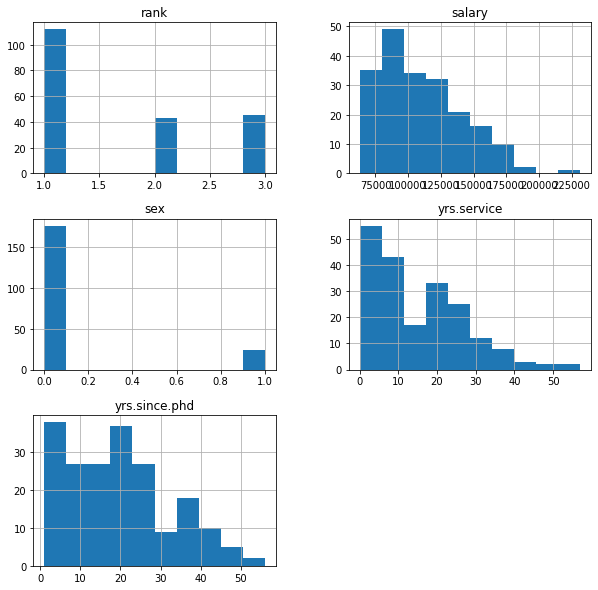

In [56]:
# Data visualizations

# histograms
dataset.hist(figsize=(10,10))
plt.show()


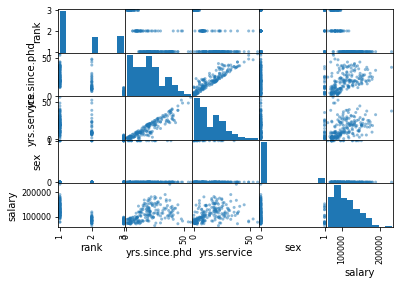

In [57]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

In [58]:
# Missing values
dataset.isnull().sum()
# In case of missing values
#dataset['Age'].fillna(value=int(dataset['Age'].median(skipna=True)), inplace=True)
#dataset['Fare'].fillna(value=int(dataset['Fare'].median(skipna=True)), inplace=True)
# For  Objective variables we need to replace with Mode
#full_df['Embarked'].fillna(value=full_df['Embarked'].mode()[0], inplace=True)


rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

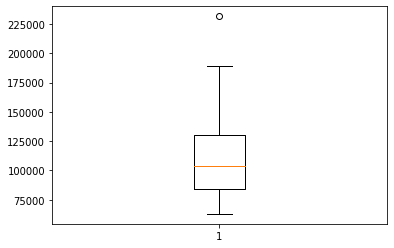

In [59]:
# Box plot
plt.boxplot(dataset['salary'])
plt.show()


In [60]:
# Outliers handleing
# Here we will  cap the outlier for above 95th percentile to 95th percentile and  below 5th percentile to 5th percentile

#dataset.loc[dataset['CreditScore']>dataset['CreditScore'].quantile(0.95),['CreditScore']]=dataset['CreditScore'].quantile(0.95)

dataset.loc[dataset['salary']>dataset['salary'].quantile(0.95),['salary']]=dataset['salary'].quantile(0.95)

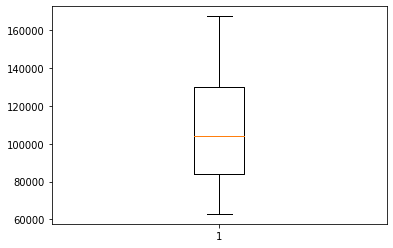

In [61]:
# Box plot
plt.boxplot(dataset['salary'])
plt.show()

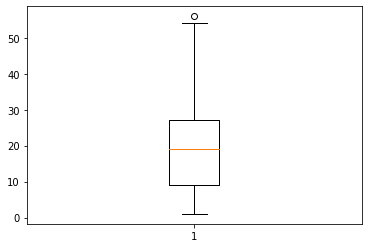

In [62]:
plt.boxplot(dataset['yrs.since.phd'])
plt.show()

In [63]:
dataset.loc[dataset['yrs.since.phd']>dataset['yrs.since.phd'].quantile(0.95),['yrs.since.phd']]=dataset['yrs.since.phd'].quantile(0.95)

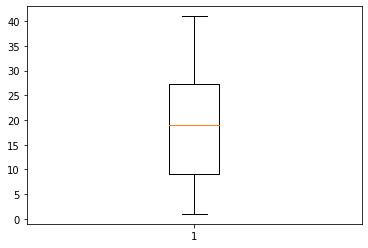

In [64]:
plt.boxplot(dataset['yrs.since.phd'])
plt.show()

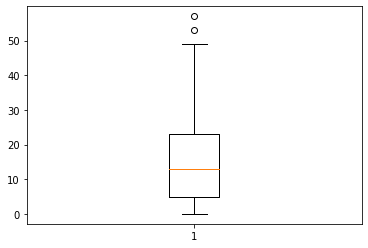

In [65]:
plt.boxplot(dataset['yrs.service'])
plt.show()

In [66]:
dataset.loc[dataset['yrs.service']>dataset['yrs.service'].quantile(0.95),['yrs.service']]=dataset['yrs.service'].quantile(0.95)

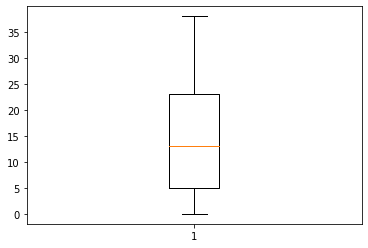

In [67]:
plt.boxplot(dataset['yrs.service'])
plt.show()

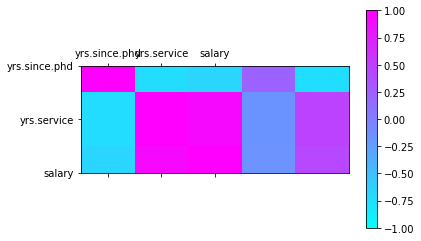

In [68]:
# correlation matrix
cols=['yrs.since.phd','yrs.service','salary']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(),cmap='cool', vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,3,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(cols)
ax.set_yticklabels(cols)
plt.show()

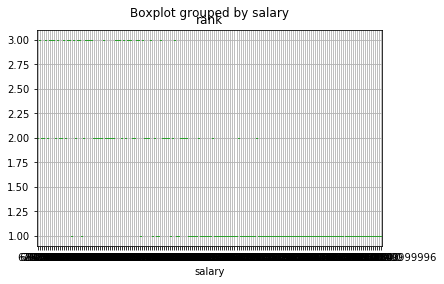

In [69]:
#Categorical-Continuous combination
dataset.boxplot(column='rank', by= 'salary')

In [70]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder=LabelEncoder()
onehotencoder=OneHotEncoder()
dataset['discipline']=labelencoder.fit_transform(dataset['discipline'])

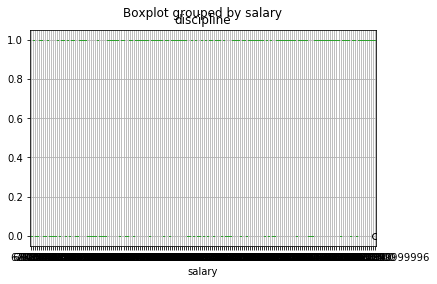

In [71]:
#Categorical-Continuous combination
dataset.boxplot(column='discipline', by= 'salary')

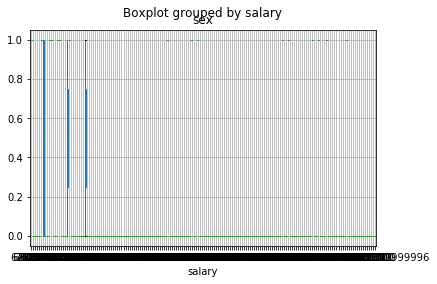

In [72]:
#Categorical-Continuous combination
dataset.boxplot(column='sex', by= 'salary')

In [73]:
dataset

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,1,19.0,18.00,0,139750.00
1,1,1,20.0,16.00,0,167351.55
2,1,1,41.0,38.05,0,115000.00
3,1,1,40.0,38.05,0,141500.00
4,1,1,30.0,23.00,0,167351.55
...,...,...,...,...,...,...
195,2,1,8.0,8.00,0,100000.00
196,2,1,13.0,10.00,1,103750.00
197,2,1,28.0,28.00,0,106300.00
198,2,1,9.0,7.00,0,113600.00


In [74]:
# Prepare Data

# Split-out validation dataset
array = dataset.values
X = array[:,:-1]
Y = array[:,5]
X[:,1]=labelencoder.fit_transform(X[:,1])

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [75]:
X_train.shape

(160, 5)

In [76]:
X_validation.shape

(40, 5)

In [77]:
# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'neg_mean_squared_error'

# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [78]:
results = []
cols=[]
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    cols.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
print(type(cv_results))

LR: -348613818.326298 (146247287.659963)
LASSO: -348610031.342791 (146242070.710976)
EN: -482742321.798893 (124202232.370412)
KNN: -560298988.203509 (210209283.239862)
CART: -580765860.141597 (328296073.596411)
SVR: -934631536.076667 (265208023.288337)
<class 'numpy.ndarray'>


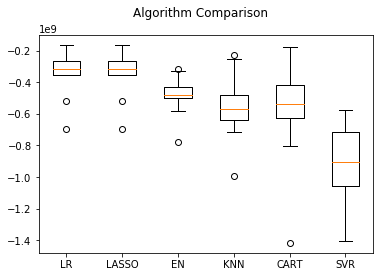

In [79]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(cols)
plt.show()

In [80]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -348613818.326298 (146247287.659962)
ScaledLASSO: -348573374.779608 (146249689.148210)
ScaledEN: -409638578.606460 (132007413.083903)
ScaledKNN: -417447239.407363 (184237360.769846)
ScaledCART: -566418998.955054 (333630204.103932)
ScaledSVR: -934122803.266815 (265307711.759236)


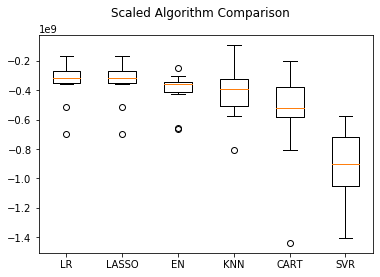

In [81]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(cols)
plt.show()

In [82]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

In [83]:
from sklearn.metrics import r2_score

In [84]:
model = LinearRegression()
model.fit(rescaledX, Y_train)
predictions=model.predict(rescaledX)
print(mean_squared_error(Y_train, predictions))

# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

 

318017941.62452686
282340969.6726203


In [85]:
r2_score(Y_validation,predictions)

0.5897877261956395

In [86]:
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# for params, mean_score, scores in grid_result.grid_scores_:
#     print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))
    
for means,stdev,neighbors in zip(grid_result.cv_results_['mean_test_score'],grid_result.cv_results_['std_test_score'],grid_result.cv_results_['params']):
    print(round(means, 6),round(stdev,6),neighbors)    

Best: -402834531.265690 using {'n_neighbors': 9}
-540927749.635922 299707629.469027 {'n_neighbors': 1}
-422144928.118456 210334706.007239 {'n_neighbors': 3}
-431202816.219062 188996520.291373 {'n_neighbors': 5}
-407408959.52897 168030892.894388 {'n_neighbors': 7}
-402834531.26569 163875042.692011 {'n_neighbors': 9}
-423023579.6662 173695269.116403 {'n_neighbors': 11}
-411468461.90229 163330230.539667 {'n_neighbors': 13}
-420899091.927917 185422905.488312 {'n_neighbors': 15}
-411675457.86813 165633638.924066 {'n_neighbors': 17}
-420962810.472057 167537619.929109 {'n_neighbors': 19}
-434407308.204206 167326789.043576 {'n_neighbors': 21}


In [87]:
model = KNeighborsRegressor(n_neighbors= 9)
model.fit(rescaledX, Y_train)
predictions=model.predict(rescaledX)
print(mean_squared_error(Y_train, predictions))

# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))


310779126.96273386
325330139.3153487


In [88]:
r2_score(Y_validation,predictions)

0.5273289018579858

In [89]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

import numpy as np
n_samples, n_features = 10, 5
np.random.seed(0)
y = np.random.randn(n_samples)
X = np.random.randn(n_samples, n_features)
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(rescaledX, Y_train)
clf.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 1e-07, 'kernel': 'linear'}

In [90]:
model = SVR(C= 10, epsilon= 0.1, gamma= 1e-07, kernel= 'linear')
model.fit(rescaledX, Y_train)
predictions=model.predict(rescaledX)
print(mean_squared_error(Y_train, predictions))

# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

846770375.6593808
640475170.4105877


In [91]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -385180987.246354 (225687958.556406)
ScaledGBM: -403527743.819356 (182953506.131438)
ScaledRF: -417796008.068373 (195250943.846455)
ScaledET: -423496234.292539 (238984970.603551)


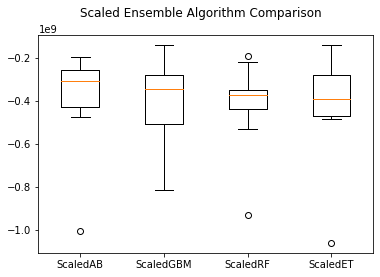

In [92]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [93]:
classifier = RandomForestRegressor()

param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }


In [94]:
from sklearn.model_selection import GridSearchCV

gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=param_grid,
                     scoring='mean_squared_error',
                     cv=5,
                     n_jobs=-1)

grid = GridSearchCV(classifier, param_grid, n_jobs=-1, cv=5)

grid.fit(X_train, Y_train)

print(grid.best_score_ )
print(grid.best_params_)

0.5978785974726252
{'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 8, 'n_estimators': 30}


In [47]:
model = RandomForestRegressor(bootstrap=True, max_features='sqrt', min_samples_split=8, n_estimators= 20)
model.fit(rescaledX, Y_train)
model.feature_importances_

predictions=model.predict(rescaledX)
print(mean_squared_error(Y_train, predictions))

# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions1 = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions1))




feature_columns =['rank','discipline','yrs.since.phd','yrs.service','sex']

import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = feature_columns,
                                                                       columns=['importance']).sort_values('importance', ascending=False)

feature_importances 





177716497.17572704
268464949.7478465


,importance
rank,4.67e-01
yrs.since.phd,2.37e-01
yrs.service,1.92e-01
discipline,1.00e-01
sex,4.76e-03


In [95]:
# Run the Regression with selected variables

# selectibnf required variables

cols = [col for col in dataset .columns if col in ['rank','yrs.since.phd','yrs.service','sex']]
datset1 = dataset[cols]
y = dataset.iloc[:,5]

X_train, X_validation, Y_train, Y_validation = train_test_split(datset1, y ,test_size=0.2, random_state=7)

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)


model = LinearRegression()
model.fit(rescaledX, Y_train)
predictions=model.predict(rescaledX)
print(mean_squared_error(Y_train, predictions))

# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))




400849873.5712451
310946541.42434293


In [96]:
# Tune scaled GBM

param_grid = dict(n_estimators=numpy.array([10,20,30,40,50,60,70,80,90,100]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# for params, mean_score, scores in grid_result.grid_scores_:
#     print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))
    
for means,stdev,neighbors in zip(grid_result.cv_results_['mean_test_score'],grid_result.cv_results_['std_test_score'],grid_result.cv_results_['params']):
    print(round(means, 6),round(stdev,6),neighbors)

Best: -404608469.384727 using {'n_estimators': 30}
-451977630.209722 141697428.579266 {'n_estimators': 10}
-407366876.701996 120008535.412793 {'n_estimators': 20}
-404608469.384727 114198444.346961 {'n_estimators': 30}
-414317199.304489 122612814.738728 {'n_estimators': 40}
-424259047.519724 134572499.037846 {'n_estimators': 50}
-438043379.547462 145257335.869948 {'n_estimators': 60}
-455586858.843532 157157694.712412 {'n_estimators': 70}
-472942866.006804 166340101.829067 {'n_estimators': 80}
-481738134.49607 171894679.376981 {'n_estimators': 90}
-489121763.288407 178823577.674511 {'n_estimators': 100}


In [97]:
# Make predictions on validation dataset

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=30)
model.fit(rescaledX, Y_train)
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

276966278.00720567


In [98]:
from sklearn.metrics import r2_score
r2_score(Y_validation,predictions)

0.5975965981833766

ValueError: Found input variables with inconsistent numbers of samples: [160, 40]